## This Notebook - Goals - FOR EDINA

**What?:**
- K-means visualisations of generated data.
- Interactive visualisation.
- Discussion of issues with k-means: elbow method and non-linearly separable data.

**Who?:**
- intro to ML course (3rd year computer science UG).
- PG students in social sciences learning ML.
- Increasingly used in non-computer science fields.

**Why?:**
- Common topic, often used in teaching and research.
- Mandatory subject for students at many universities.

**Noteable features to exploit:**
- Visualisation
- Interactive visualisation libraries (bokeh),
- Tutorial format
- Embedded latex
- Pre-installed library use

**How? Tools/methods used:**
- <code>bokeh</code> - interactive visualisation
- embedded latex

<hr>

# K-means clustering

K-means is a simple and common clustering algorithm. 

It is unsupervised, meaning that labels are not used to train the model on "known" data. Instead, the algorithm uses the properties of the data points (*samples*) to group each point into clusters.

### Uses of K-means

K-means is used to cluser data that does not have explicit labels. This can help give an intuition about what is going on within the data.

K-means is additionally used as a dimension reduction technique, whereby the clustering given by the algorithm is used to represent data in further processing.

### Goal - What is a successful clustering?

K-means is a polythetic method, meaning that it aims to group points that are similar to one another. The alternative to this is monothetic methods, which cluster groups based on some common property such as age.

K-means assumes that a good cluster has the following properties:
- The centre of the cluster *(centroid)* is the mean average of the points in that cluster.
- Each point in the cluster is closer to that cluster's centroid than any other cluster's centroid.

Based on this idea of success, the goal is to minimise the aggregate intra-cluster distance. This objective function takes the following form: sum the distances between each point, $x_i$ and it's assigned cluster centre, $c_j$:

$$
J = \sum_{j=1}^{K} \sum_{i=1}^{N} ‖ \mathbf{x}_i^{(j)} - {\mu}_j ‖^2
$$

Where:
- $K$ is the number of clusters, chosen in advance,
- ${x}_i$ is the $i$'th data point in the set, and 
- ${\mu}_j$ is the centroid for cluster $j$

### Algorithm - How does it work?

<strong>K-means input:</strong>
- $N$ instances of d-dimensional data
- $K$ - the number of populations that are to be extracted from the data.

Whilst there is scope to use alternative distance measures, Euclidean distance will be used in this tutorial.

<strong>K-means general approach:</strong>
- Initialise $K$ centroids randomly
- Iterate the following until convergence (no change in centroids):
    - For each data point, $x_i$ in data set, compute distance to every centroid. Assign point to cluster with nearest centroid.
    - Compute new centroids, ${\mu}_j$ by taking a mean average of all points now in that cluster.
    
Once the centroids stop changing, the objective function (above) can be calculated.
    
<i><strong>Note:</strong> Notice that the cluster centres are initialised <strong>randomly</strong>. This means that running the algorithm with a different random state will yield different results. For this reason, this tutorial sets the random state in every function that involves randomness, which means the results will not change each time the notebook is run. If using k-means in practise, it is almost always necessary to run the algorithm a few times with different random states in order to attain a comprehensive picture of results.</i>

<hr>

## Importing useful libraries

The following cell loads some useful python code to use later. These are all pre-installed on Noteable, so they just need to be loaded into the notebook.

In [1]:
import numpy as np

import sklearn.datasets as ds
import sklearn.cluster as cl

import matplotlib.pyplot as plt
# magic iPython function
%matplotlib inline    

from bokeh.plotting import figure, show
from bokeh.io import output_notebook    
import bokeh

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

<hr>

# Data

To show the results of the algorithm, some data is needed for practice! [Scikit-learn](https://scikit-learn.org/stable/) provides some useful functions for generating pretend data.

The function provides data (here stored in variable <code>X</code>) and labels (stored in variable <code>y</code>). Because this is an unsupervised learning method, the labels won't be used to assign clusters, but will come in handy later when the model performance is assessed. Additionally, a random state is used for reproducibility.

The data generated will be 2D, with 1000 data points in 4 "blobs".

In [2]:
# generate pretend "blob" data
X, y = ds.make_blobs(n_samples=1000, centers=4, 
                          cluster_std=0.7, random_state=0)

Since this data is only 2D, it can be plotted for visualisation.

One of the useful visualisation libraries included in the Noteable service is [bokeh](https://bokeh.org). The functions included in this library allow for interactive graphs within the notebook.

The cell below plots the data (in rainbow colours, because we can). You can drag the resultant graph about, zoom in and out and more.

In [3]:
# tell bokeh to plot to the notebook
output_notebook()

# define rainbow colours for plot
xcols = np.random.random(size=1000) * 500
ycols = np.random.random(size=1000) * 500
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in 
    zip(xcols, ycols)
]

# specify figure and title
p = figure( plot_width=450, plot_height=350)
p.circle(X[:,0], X[:,1], radius=0.05, fill_color=colors, 
         fill_alpha=0.8, line_color=None)
p.title.text = "Raw blobs data"
p.title.align = "center"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

<hr>

# Run K-Means

Time to put k-means to the test, and see if the algorithm can pick out the groups in the underlying data.

K-means requires a $K$ value as input, so the number of clusters desired needs to be selected up front. Here, it is sensible to pick $K=4$ since it is clear from the data above that the points fall into 4 clusters.

The next cell uses scikit-learn's [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering algorithm to sort the data into 4 clusters, then prints out the resulting clusters. 

The larger black hexagons on the graph are the cluster centroids for each cluster.

In [4]:
# create model - note we choose k=4 and set a random state
kmeans = cl.KMeans(4, random_state=100)

# fit model to blobs data
kmeans.fit(X)

# store labels and centroids
Y  = kmeans.labels_.astype(np.int) 
mu = kmeans.cluster_centers_ 

# specify colours for clusters
four_colors = np.array([x for x in ('#c22980', '#6d48d8', '#fabb1b', '#0ff')])

# tell bokeh to plot to the notebook
output_notebook()

# specify figure and title
p = figure(plot_width=450, plot_height=350)

# plots different colors for different clusters
p.circle(X[:,0], X[:,1], radius=0.05, 
         color=four_colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)
# Plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")

p.title.text = "Clusters with centroids"
p.title.align = "center"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

Looks like k-means did a reasonable job! Whilst a graph is useful for this example, it can sometimes be important to gather other performance statistics such as accuracy:

In [5]:
# create function to calculate accuracy
def acc(y,y_pred):
    correct = np.sum(y == y_pred)
    incorrect = np.sum(y != y_pred)
    accuracy = correct / (correct+incorrect)
    print("Accuracy is: " + str(accuracy*100) + "%")

In [6]:
# find accuracy in this instance
acc(y,Y)

Accuracy is: 49.6%


This may seem low given the graph looks good. But bear in mind that there are no strict labels - the numbers associated with each cluster are intended as a way to group each sample, not make any claim about the characteristics of the group itself.

In other words, the number associated with each group may change (try changing the random state when setting up the model). Suppose the groupings are identical, but the numbers differ between the original labels and the labels assigned in the model. 

This could be challenging to resolve, but in this case there are only 4 clusters  which can be easily visualised. 

The following plot demonstrates this. Points that have been assigned the same label as the original data are represented by green markers, and points that have different labels are represented by red markers.

In [7]:
# take intersect of prediction and ground truth
correct_vector = 1*(np.equal(y,Y))

# tell bokeh to plot to the notebook
output_notebook()

# specify colours for clusters
colors2 = np.array([x for x in ('red', 'green')])

# specify figure
p = figure(plot_width=450, plot_height=350)
# plots different colors for different clusters
p.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors2[correct_vector].tolist(), fill_alpha=0.5, 
         line_color=None)

# plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")

p.title.text = "k-means labels against original labels"
p.title.align = "center"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

As you can see, the uppermost clusters have been assigned different labels to the lower clusters.

The label numbers can be deduced by referring to the colour palette used in the visualisations above.

The line of code corresponding with labels 0 to three is defined in the line of code:

<code>four_colors = np.array([x for x in ('#c22980', '#6d48d8', '#fabb1b', '#0ff')])</code>

Each of these are hexadecimal value codes for the colours:
<p style="color:#c22980">#c22980 - pink - label "0"</p>
<p style="color:#6d48d8">#6d48d8 - purple - label "1"</p>
<p style="color:#fabb1b">#fabb1b - yellow - label "2"</p>
<p style="color:#0ff">#0ff - blue - label "3"</p>

The cell below plots the labels as per this color scheme.

In [8]:
# tell bokeh to plot to the notebook
output_notebook()

# specify colours for clusters
colors = np.array([x for x in ('#c22980', 
                               '#6d48d8', '#fabb1b', '#0ff')])

# specify figure for true labels
left = figure(plot_width=350, plot_height=350)

# plot with colours of true data
left.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[y].tolist(), fill_alpha=0.5, 
         line_color=None)
left.title.text = "Labels given by k-means"
left.title.align = "center"

# plot with colours of predicted data
right = figure(plot_width=350, plot_height=350)
right.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)
right.title.text = "Labels given in original data"
right.title.align = "center"

# plot in notebook (interactive)
p = bokeh.layouts.gridplot([[left,right]])

show(p)

Loading BokehJS ...

Note that the top two clusters are pink and blue in both, but that the colours are switched between the two graphs.

The chart below shows the labels as deduced from the above graphs(from top to bottom):

| cluster in image | true label | predicted label |
|------------------|------------|-----------------|
| top              | blue=3     | pink=0          |
| second           | pink=0     | blue=3          |
| third            | yellow=2   | yellow=2        |
| bottom           | purple=1   | purple=1        |

Therefore, to amend the problem and attain a new score, switch the labels 0 and 3 in the predicted labels.

In [9]:
# take copy of predictions
new_pred = np.copy(Y)

# find predictions labelled 0 and 3
where_0s = np.where(new_pred==0)
where_3s = np.where(new_pred==3)

# switch 0 to 3, switch 3 to 0
new_pred[where_0s] = 3
new_pred[where_3s] = 0

# print first few prediction labels to check as expected
print(Y[:20])
print(new_pred[:20])

[0 3 0 2 1 3 3 1 3 3 0 1 2 0 1 2 2 0 3 1]
[3 0 3 2 1 0 0 1 0 0 3 1 2 3 1 2 2 3 0 1]


Now the colours of most data points should match up between the predicted and original labels. 

Visualise as before:

In [10]:
# tell bokeh to plot to the notebook
output_notebook()

# plot with colours of predicted data
left = figure(plot_width=350, plot_height=350)
left.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[new_pred].tolist(), fill_alpha=0.5, 
         line_color=None)
left.title.text = "Labels given by k-means - reassigned"
left.title.align = "center"

# plot with colours of true data
right = figure(plot_width=350, plot_height=350)
right.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[y].tolist(), fill_alpha=0.5, 
         line_color=None)
right.title.text = "Labels given in original data"
right.title.align = "center"

# plot in notebook (interactive)
p = bokeh.layouts.gridplot([[left,right]])

show(p)

Loading BokehJS ...

As you can see, the colours of points match up much better!

Calculate the score again (using the function defined above):

In [11]:
# score with reassigned prediction values
acc(y,new_pred)

Accuracy is: 99.1%


The accuracy has gone up to 99.1%, a very high score!

<hr>

# Limitations of k-means

## Non-linearly separable data

Like all clustering algorithms, k-means handles some kinds of data more effectively than others. In the above example, the algorithm is used on data that clearly separates out into groups. But in data that isn't linearly seperable, it can misclassify.

The next example generates some data in the shape of moons:

In [12]:
# generate moon shaped data
moon_data, moon_true = ds.make_moons(n_samples=200, noise=0.03, 
                                     random_state=0)

In [13]:
# plot generated data using bokeh

# tell bokeh to plot to the notebook
output_notebook()

# define rainbow colours for plot
xcols = np.random.random(size=200) * 500
ycols = np.random.random(size=200) * 500
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in 
    zip(xcols, ycols)
]

# specify figure and title
p = figure(plot_width=450, plot_height=350)
p.circle(moon_data[:,0], moon_data[:,1], 
         radius=0.025, fill_color=colors, 
         fill_alpha=0.8, line_color=None)

p.title.text = "Moon data"
p.title.align = "center"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

Apply k-means to the new data. Again, generate a model and fit to the data.

In [14]:
# create model - note we choose K=2 and set a random state
kmeans = cl.KMeans(2, random_state=0)

# fit model to data
kmeans.fit(moon_data)

# store the predicted labels and cluster centres
Y = kmeans.labels_.astype(np.int)
mu = kmeans.cluster_centers_

# tell bokeh to plot to the notebook
output_notebook()

# specify colours for clusters
colors = np.array([x for x in ('#c22980', 
                               '#6d48d8')])

# specify figure and title
p = figure(plot_width=450, plot_height=350)

# plots different colors for different clusters
p.circle(moon_data[:,0], moon_data[:,1], radius=0.025, 
         color=colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)

# Plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")

p.title.text = "Moon data - classified"
p.title.align = "center"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

## The problem of picking K

In the first example in this notebook, it was fairly obvious that 4 clusters were present in the data. In real life data, this is rarely the case. 

Additionally the objective function will improve the closer the value to $K$. Imagine the case where $K$ is the number of samples - the distance from each point to its centroid would be 0, since each point would be the same as it's centroid. But of course the number of points is massive, and the result will simply be clusters that are themselves the data points each with it's own label!

So what is the best number of clusters to find in a data set? As a ballpark figure for basic exercises, 5 is often a good starting point. But we can do better. One way of finding a good first try figure is to try different values and apply the elbow method.

The following code plots the value of the objective function for $K$ values from 1 to 10, when k-means is applied to the original blobs data.

Note that the [inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) attribute is used to find the value of the objective function in this case.

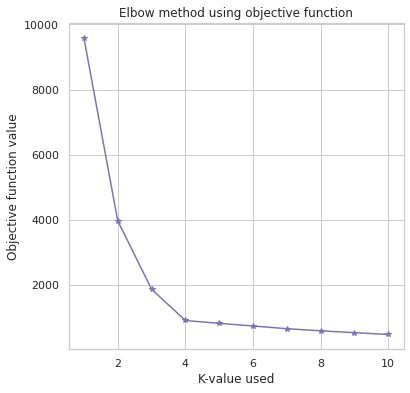

In [15]:
# Run the k-means algorithm and get the index of data points clusters

sse = []
Ks = range(1, 11)

# for K values 1 to 10
for k in Ks:
    # fit a kmeans model with k clusters on original data
    km = cl.KMeans(n_clusters=k, random_state=0).fit(X)
    # find value of objective function
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(Ks, sse, '-m*')
plt.xlabel('K-value used')
plt.ylabel('Objective function value')
plt.title("Elbow method using objective function")

plt.show()

As shown in the graph above, there is an "elbow" at $K=4$ where the curve flattens out. The objective function (which we want to minimise) does not improve much beyond $K=5$ (the graph flattens).

Since using higher values of $K$ can be costly, $K=4$ is a sensible choice in this case.

<hr>

## Closing remarks

K-means provides a fairly intuitive way to group data, but has its limitations. This notebook has covered the basics of k-means visualisation and theory.

As a follow on exercise, it may be helpful to attempt k-means on some data of your own. Scikit-learn has some [inbuilt datasets](https://scikit-learn.org/stable/datasets/index.html) which may be helpful in this task.